## Data620 - Project 2
#### Gabriel Santos 
#### Date: 03-02-2023 

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

In [5]:
import csv
import math
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib as plot
import pandas as pd

In [6]:
nba_data = csv.reader(open("E:\\Users\\drake\\Documents\\CUNY SPS\\MASTERS\\DATA 620\\Week 6\\NBA_network.csv"))

In [7]:
nbadata = pd.read_csv("E:\\Users\\drake\\Documents\\CUNY SPS\\MASTERS\\DATA 620\\Week 6\\NBA_network.csv")

Lets analyze the network of NBA players to identify which players have been teammates.

Based on the data set we can see for each player what team he was playing for each NBA season. There are 16 seasons for each player.

In [8]:
print(nbadata)

           Blazers2018    Damian Lillard  2018       Blazers  Player
0          Blazers2018       CJ McCollum  2018       Blazers  Player
1          Blazers2018      Jusuf Nurkic  2018       Blazers  Player
2          Blazers2018   Al-Farouq Aminu  2018       Blazers  Player
3          Blazers2018        Seth Curry  2018       Blazers  Player
4          Blazers2018  Maurice Harkless  2018       Blazers  Player
...                ...               ...   ...           ...     ...
2450  Timberwolves2009      Corey Brewer  2009  Timberwolves  Player
2451  Timberwolves2009   Wayne Ellington  2009  Timberwolves  Player
2452      Warriors2009     Stephen Curry  2009      Warriors  Player
2453       Wizards2009        Nick Young  2009       Wizards  Player
2454       Wizards2009      JaVale McGee  2009       Wizards  Player

[2455 rows x 5 columns]


In [39]:
print(nba_data)

In [40]:
g = nx.Graph()
teams = []
players = []

In [41]:
for row in nba_data:
    if row[0] not in teams:
        teams.append(row[0])
    if row[1] not in players:
        players.append(row[1])
    g.add_edge(row[0], row[1], weight=1)

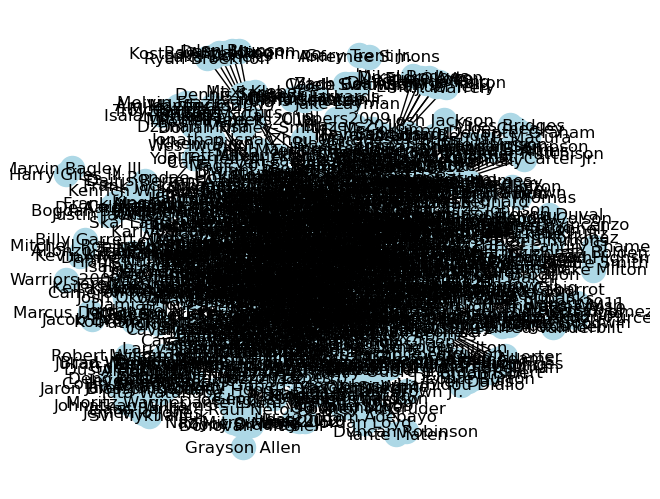

In [42]:
nx.draw(g, node_color='lightblue', with_labels=True)

The graph is not clear, since the amount of information is too large.

In [46]:
print( "nodes:", len(g))
print("teams:", len(teams))
print( "players:", len(players))

nodes: 827
teams: 298
players: 529


In [47]:
connected_net = list(nx.connected_components(g))
print("size of largest component:", len(connected_net[0]))

size of largest component: 827


We can see that the number of nodes is equal to the largest component. We can think that each player has some relationship with the other players.

#### Create an affiliation network of only teams and create an affiliation network of only players

In [48]:
teamnet = bi.weighted_projected_graph(g, teams)

In [49]:
playernet = bi.weighted_projected_graph(g, players)

Degree centrality among players

In [53]:
deg = nx.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)
print("Top 10 players highest degree:")
deg_list[0:9]

Top 10 players highest degree:


[('Anthony Tolliver', 76),
 ('Michael Beasley', 69),
 ('Jerryd Bayless', 68),
 ('Omri Casspi', 67),
 ('Marco Belinelli', 67),
 ('Jeremy Lin', 64),
 ('Corey Brewer', 64),
 ('Quincy Acy', 64),
 ('Lance Stephenson', 63)]

In the list we can see which players have the highest degree. The player with the highest degree is Anthony Tolliver.

Closeness centrality of players:

In [56]:
import operator
closeness_cen = nx.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))
print("Top 10 player highest closeness:")
closeness_list[520:529]

Top 10 player highest closeness:


[('Jerryd Bayless', 0.5038167938931297),
 ('Zaza Pachulia', 0.504297994269341),
 ('Michael Beasley', 0.5047801147227533),
 ('Jeremy Lin', 0.5057471264367817),
 ('Marco Belinelli', 0.5057471264367817),
 ('Kosta Koufos', 0.5067178502879078),
 ('Jeff Green', 0.5076923076923077),
 ('Jose Calderon', 0.5141187925998053),
 ('Anthony Tolliver', 0.5274725274725275)]

Betweenness centrality of players

In [60]:
betweenness_cen = nx.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))
print("Top 10 players highest betweenness:")
betweenness_list[520:529]

Top 10 players highest betweenness:


[('Nick Young', 0.012476725270877566),
 ('Lance Stephenson', 0.012795678748128555),
 ('Corey Brewer', 0.013005003600704298),
 ('Marco Belinelli', 0.013344896469167864),
 ('Shelvin Mack', 0.013664354126294583),
 ('Jerryd Bayless', 0.01551351456282852),
 ('Michael Beasley', 0.015785183087930837),
 ('Anthony Tolliver', 0.01633441018532702),
 ('Isaiah Thomas', 0.018071047650223493)]

#### The Island Method

The players with the highest degree:

In [62]:
print("degree, number of players")
deg_tests = [30, 40, 50, 60, 70, 80]
num_players = 0
for i in deg_tests:    
    for j in players:
        if deg(j)>i:
            num_players = num_players + 1
    print(i, num_players)
    num_players = 0

degree, number of players
30 253
40 135
50 55
60 14
70 1
80 0


I did picked the players who have a grade higher than 47 to see how they relate to each other.

The players with 47+ degree:

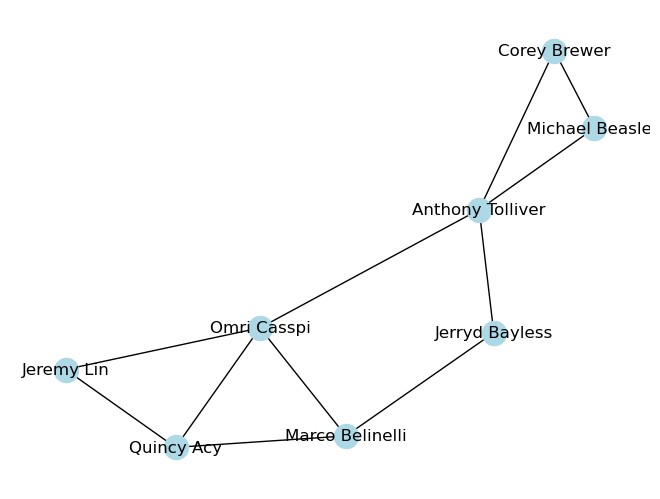

In [69]:
playernet64 = playernet.copy()
for i in players:
    if deg(i)<64:
        playernet64.remove_node(i)
nx.draw(playernet64, node_color='lightblue', with_labels=True)

In [64]:
deg_list = sorted(playernet64.degree, key=lambda x: x[1], reverse=True)
deg_list[0:9]

[('Omri Casspi', 4),
 ('Anthony Tolliver', 4),
 ('Marco Belinelli', 3),
 ('Quincy Acy', 3),
 ('Jeremy Lin', 2),
 ('Michael Beasley', 2),
 ('Corey Brewer', 2),
 ('Jerryd Bayless', 2)]

The players with the highest connections are Omri Casspi and Anthony Tolliver. 

Network of Current All Stars

In [23]:
all_stars = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwayne Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             'DAngelo Russell',
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

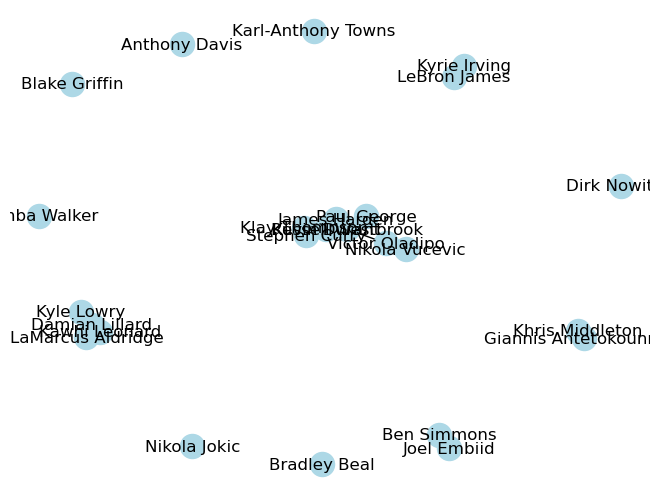

In [65]:
all_star_network = playernet.copy()
for i in players:
    if i not in all_stars:
        all_star_network.remove_node(i)
nx.draw(all_star_network, node_color='lightblue', with_labels=True)

In [66]:
deg_list = sorted(all_star_network.degree, key=lambda x: x[1], reverse=True)
deg_list[0:4]

[('Russell Westbrook', 4),
 ('Kevin Durant', 4),
 ('Victor Oladipo', 2),
 ('Kawhi Leonard', 2)]

In [68]:
connected_net = list(nx.connected_components(all_star_network))
print("Size of largest all star component:", len(connected_net[0]))

Size of largest all star component: 4


#### Conclusion

Anthony Tolliver is the most connected player in the entire NBA league. the second player is Michael Beasley.

On the list of All Star players, the players who have been on the list the most are Russell Westbrook and Kevin Duran, with 4 times.